<a href="https://colab.research.google.com/github/erbisti/Collab/blob/main/AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**One-Class SVM - Máquina de suporte com objetivo de separar oa dados outliers**

Estabelece uma fronteira de decisão que detecta um ponto de otimização entre a fronteira de decisão e a densidade populacional da amostra.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,217 (12.57 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.2660 - val_loss: 0.0910
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0898 - val_loss: 0.0840
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0837 - val_loss: 0.0803
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0807 - val_loss: 0.0783
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0786 - val_loss: 0.0769
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0772 - val_loss: 0.0757
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0764 - val_loss: 0.0749
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0755 - val_loss: 0.0743
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0750 - val_loss: 0.0738
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0744 - val_loss: 0.0733
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


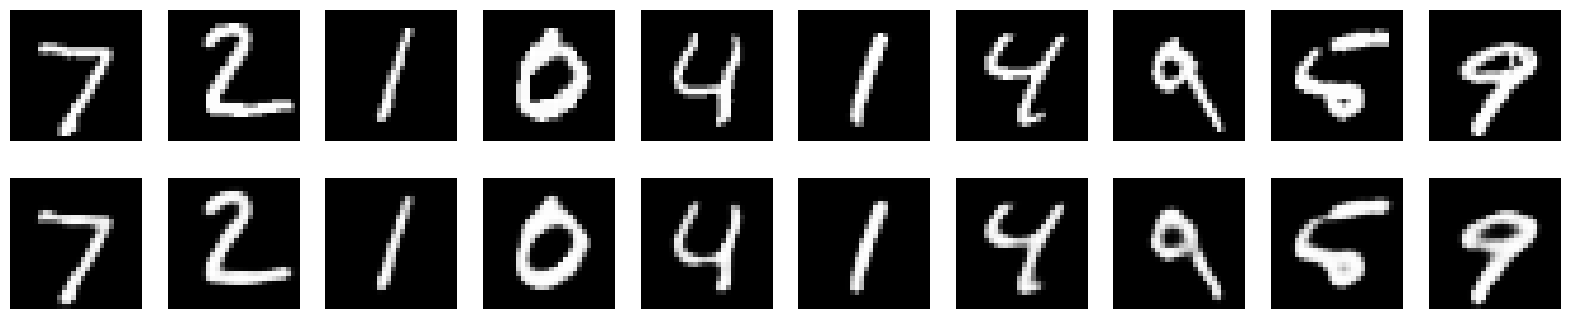

In [1]:
# Importa o TensorFlow e módulos úteis
import tensorflow as tf
from tensorflow.keras import layers, models  # Camadas e modelos da Keras
import numpy as np
import matplotlib.pyplot as plt  # Para visualização dos resultados

# Carrega o conjunto de dados MNIST (imagens de dígitos manuscritos - base completa)
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
# Normaliza os pixels das imagens para o intervalo [0, 1]
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
# Adiciona o canal de cor (necessário para convoluções, apenas adiciona o "1" indicando profundidade)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# INÍCIO DO MODELO AUTOENCODER

# Entrada da rede: imagem 28x28 com 1 canal (escala de cinza)
input_img = tf.keras.Input(shape=(28, 28, 1))

# CAMADAS DO ENCODER

# Primeira camada convolucional: extrai 16 mapas de características (features), usa ReLU, mantém tamanho com padding
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
# Reduz pela metade o tamanho da imagem (28x28 → 14x14) com max pooling
x = layers.MaxPooling2D((2, 2), padding='same')(x)

# Segunda camada convolucional: extrai 8 mapas, mantém tamanho
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# Reduz novamente (14x14 → 7x7)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Nesse ponto, temos o espaço latente (codificado) de dimensão 7x7x8 = 392 features

# CAMADAS DO DECODER (reconstrói a imagem a partir do encoding)

# Primeira camada de decodificação: mantém tamanho e ativa com ReLU
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
# Aumenta o tamanho da imagem (7x7 → 14x14)
x = layers.UpSampling2D((2, 2))(x)

# Segunda camada: aumenta canais para 16 e mantém tamanho
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
# Aumenta tamanho novamente (14x14 → 28x28)
x = layers.UpSampling2D((2, 2))(x)

# Saída final: reconstrói a imagem original com 1 canal
# Usa sigmoide para gerar valores entre 0 e 1 (mesmo intervalo da entrada)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Define o modelo completo: da imagem de entrada à imagem reconstruída
autoencoder = models.Model(input_img, decoded)

# Compila o modelo usando o otimizador Adam e função de perda binária (adequada para [0,1])
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Mostra um resumo do modelo com número de parâmetros e camadas
autoencoder.summary()

# TREINAMENTO DO MODELO

# Treina o autoencoder:
# - entrada: imagem original
# - saída: imagem original (modelo aprende a reconstruí-la)
# - epochs: número de ciclos completos sobre o dataset
# - batch_size: quantas imagens por passo de atualização
# - shuffle: embaralha os dados a cada epoch
# - validation_data: usa x_test para ver desempenho fora do treino
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

# APLICAÇÃO: Reconstrução das imagens de teste
decoded_imgs = autoencoder.predict(x_test)

# VISUALIZAÇÃO DOS RESULTADOS

# Exibe 10 imagens originais e suas reconstruções
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Linha 1: imagens originais
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Linha 2: imagens reconstruídas
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()
